# Aufgaben





Elias Schuck

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import statsmodels.formula.api as smf

## Aufgabe 6
**Haben mehr Frauen oder mehr Männer unsere Autos gekauft?**


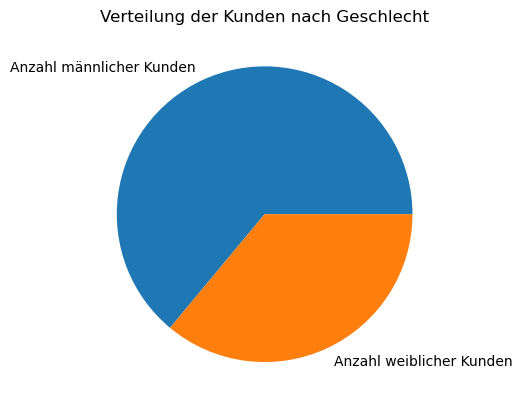

In [3]:
df = pd.read_csv("data/df_final.csv")
df_käufer = df[df["Preis"] > 0]
df_käufer
df_käufer_w = df_käufer[df_käufer['Geschlecht']==0]
anzahl_kunden_w = df_käufer_w['Geschlecht'].count()
df_käufer_m = df_käufer[df_käufer['Geschlecht']==1]
anzahl_kunden_m = df_käufer_m['Geschlecht'].count()
x = [anzahl_kunden_m, anzahl_kunden_w]
y = ['Anzahl männlicher Kunden', 'Anzahl weiblicher Kunden']
plt.pie(x, labels = y)
plt.title("Verteilung der Kunden nach Geschlecht")
plt.show()

## Aufgabe 7
**Wie hoch ist das Durchschnittsalter unserer Kunden?**
<p>df_käufer["Alter"].mean().round(2)</p>
<p>50.38</p>

## Aufgabe 8
**Wie hoch ist das Durchschnittsalter der Besucher in unseren Showrooms?**

<p> Zunächst werden die Besucher von den Käufern isoliert (Kaufpreis = 0) </p>
<p> df_besucher = df[df['Preis']==0] </p>
Nun kann das Durchsnittsalter der Besucher errechnet werden:

df_besucher['Alter'].mean().round(2)

49.88


## Aufgabe 9
**Was ist das Durchschnittsalter unserer männlichen Kunden?**

<p> df_käufer_m['Alter'].mean().round(2) </p>
<p> 50.47 </p>

## Aufgabe 13
**Wie viele Kunden haben keinen Kredit bei der Bank genommen, um das Auto zu kaufen? Die Kundenabteilung hat vergessen, diese Informationen zu sammeln. Wir können davon ausgehen, dass die Kunden mit einem Jahreseinkommen, das höher als der Autopreis ist, keinen Bankkredit benötigten**

## Aufgabe 17

**Schätzen Sie eine Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt. Verwenden Sie die entsprechende Methode**

## Aufgabe 18

**Wie hoch ist die Wahrscheinlichkeit, dass ein 32-jähriger männlicher Kunde mit einem Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat, eines unserer Modelle kauft? Wie hoch ist die Wahrscheinlichkeit, dass ein 51-jähriger männlicher Kunde mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat, eines unserer Modelle kauft?**